In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
a=pd.read_csv("/content/WineQT.csv")
a

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

In [ ]:
a.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [ ]:
a.shape

(1143, 13)

In [ ]:
a.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [ ]:
a.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
a.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
for col,value in a.items():
  if col != 'type':
    a[col]=a[col].fillna(a[col].mean())

In [ ]:
a.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

IndexError: ignored

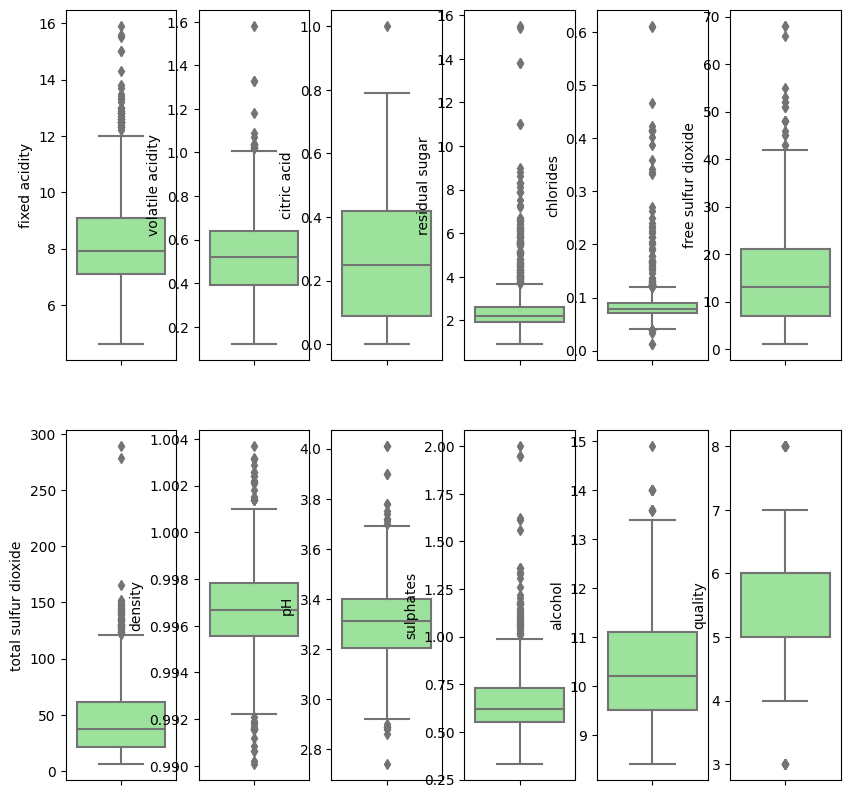

In [ ]:
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(10,10))
index=0
ax=ax.flatten()
for col, value in a.items():
  if col != 'type':
    sns.boxplot(y=col, data=a, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

<ipython-input-12-e6dfa82dec34>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
<ipython-input-12-e6dfa82dec34>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
<ipython-input-12-e6dfa82dec34>:7: UserWarning: 

`distplot` is a deprecated function and wi

IndexError: ignored

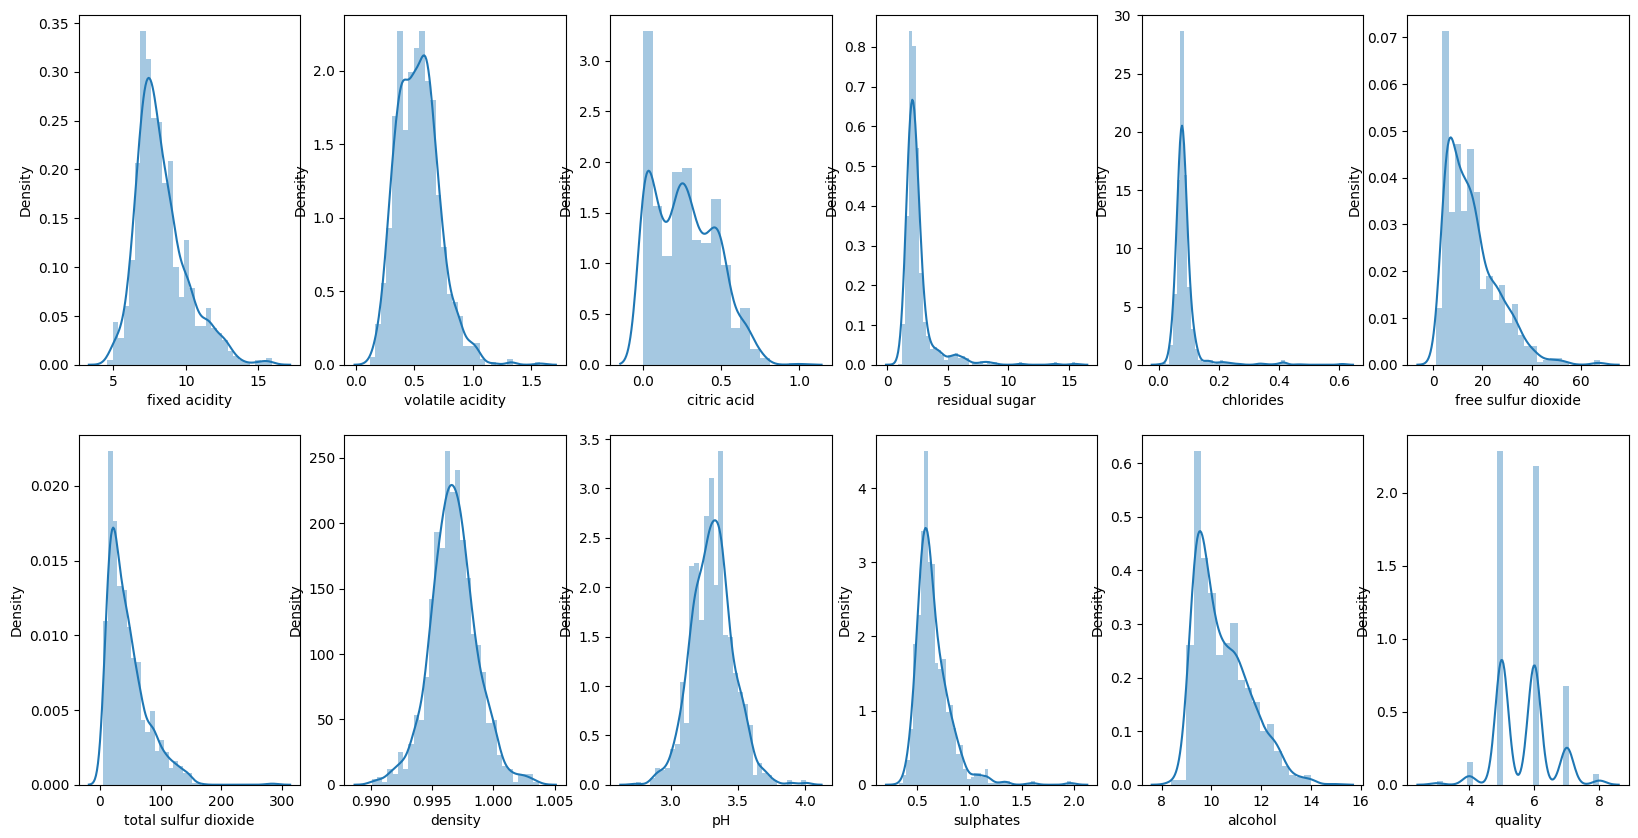

In [ ]:
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in a.items():
  if col != 'type':
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)
plt.show

<Axes: xlabel='quality', ylabel='count'>

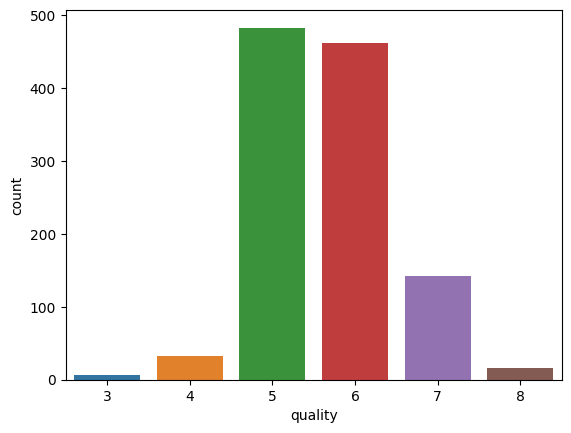

In [ ]:
sns.countplot(x=a['quality'])

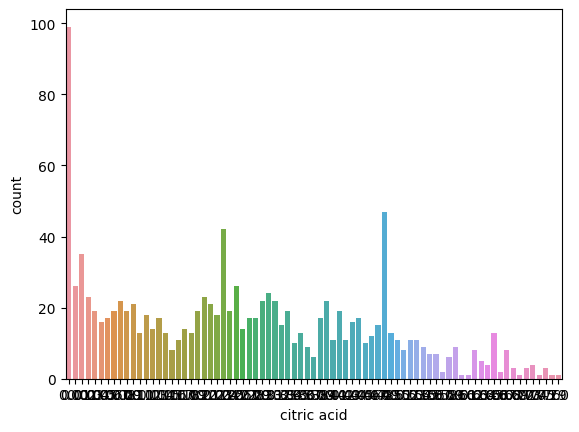

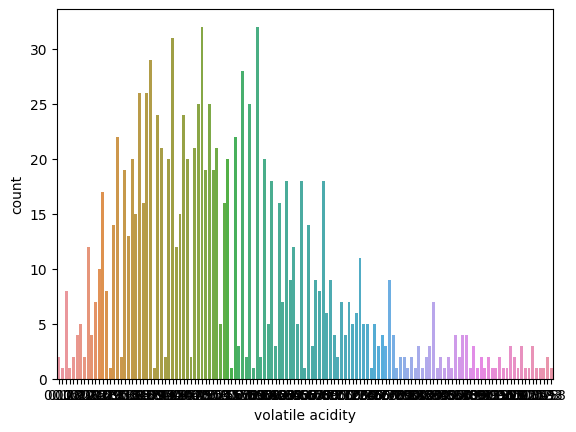

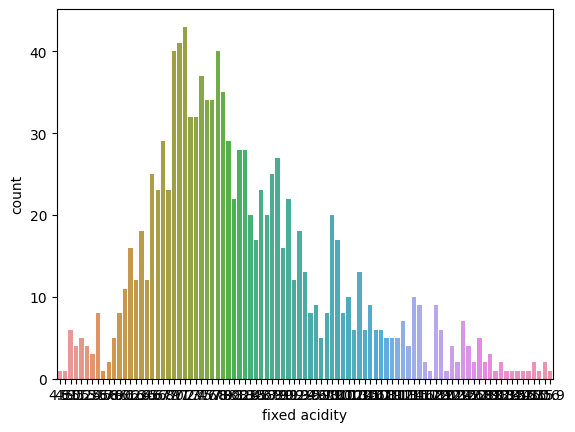

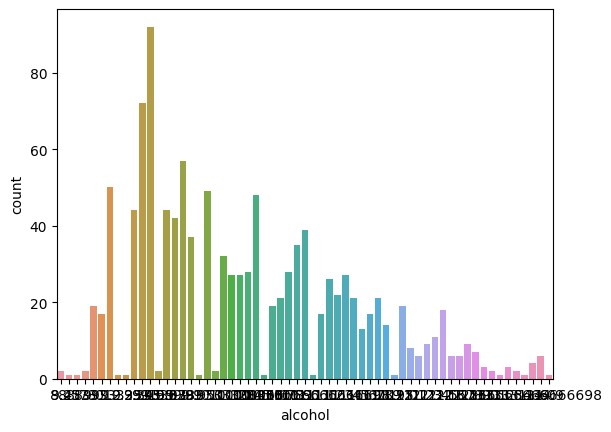

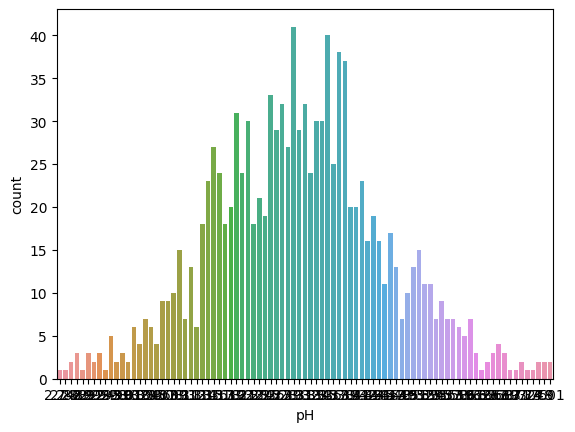

In [ ]:

sns.countplot(x=a['citric acid'])
plt.show()
sns.countplot(x=a['volatile acidity'])
plt.show()
sns.countplot(x=a['fixed acidity'])
plt.show()
sns.countplot(x=a['alcohol'])
plt.show()
sns.countplot(x=a['pH'])
plt.show()


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

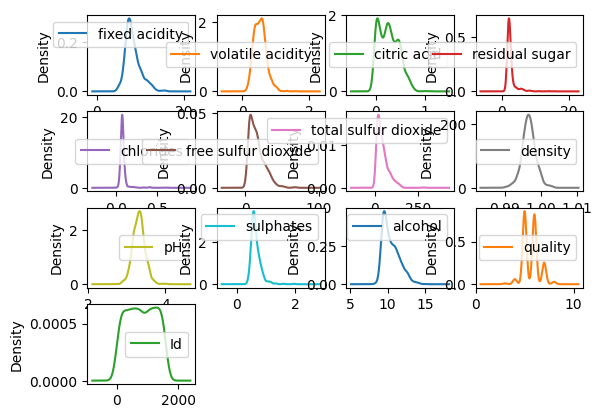

In [ ]:
a.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

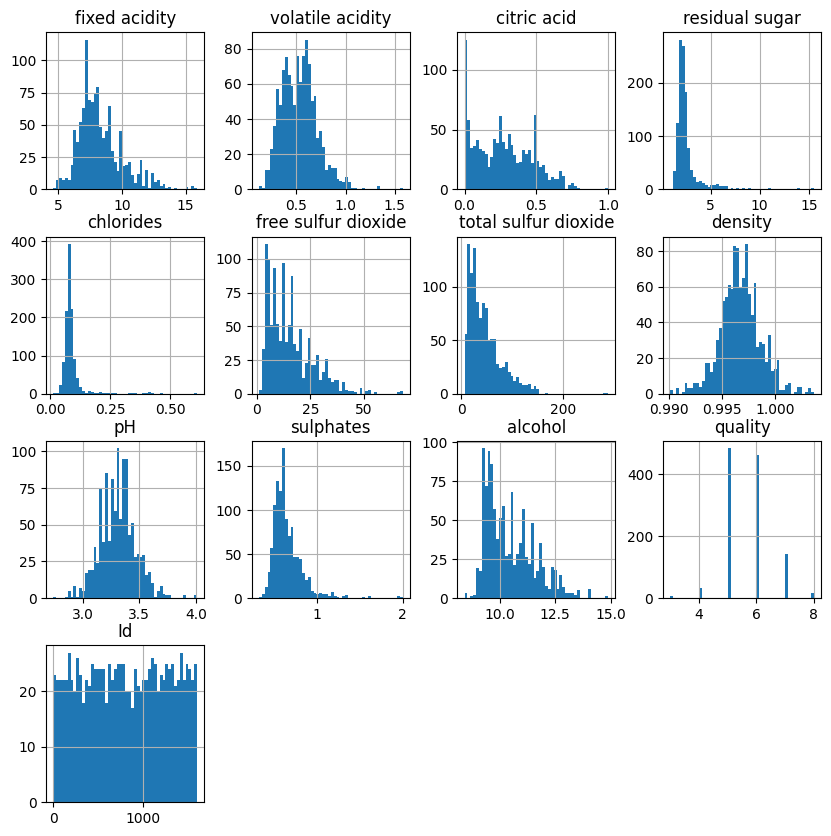

In [ ]:
a.hist(figsize=(10,10),bins=50)
plt.show()

<Axes: xlabel='quality', ylabel='Density'>

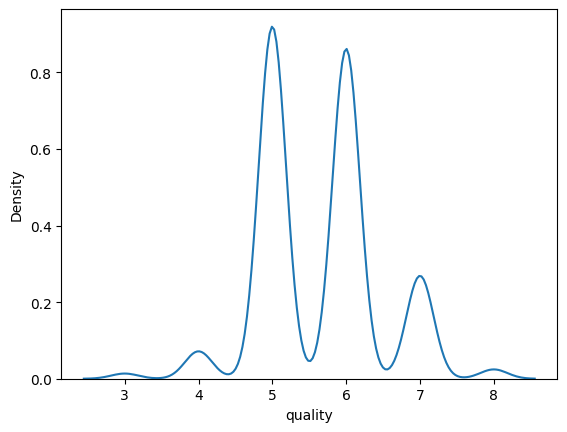

In [ ]:
sns.kdeplot(a.query('quality > 2').quality)

Feature fixed acidity has skewness 1.0435581570203705
Feature volatile acidity has skewness 0.6806526689497612
Feature citric acid has skewness 0.3710729929318701
Feature residual sugar has skewness 4.355371093085976
Feature chlorides has skewness 6.018448660519524
Feature free sulfur dioxide has skewness 1.229644739026475
Feature total sulfur dioxide has skewness 1.6635791721121174
Feature density has skewness 0.10226068292206784
Feature pH has skewness 0.22084807837665207
Feature sulphates has skewness 2.4939876038821924
Feature alcohol has skewness 0.8621798614666255
Feature quality has skewness 0.2864151961088048


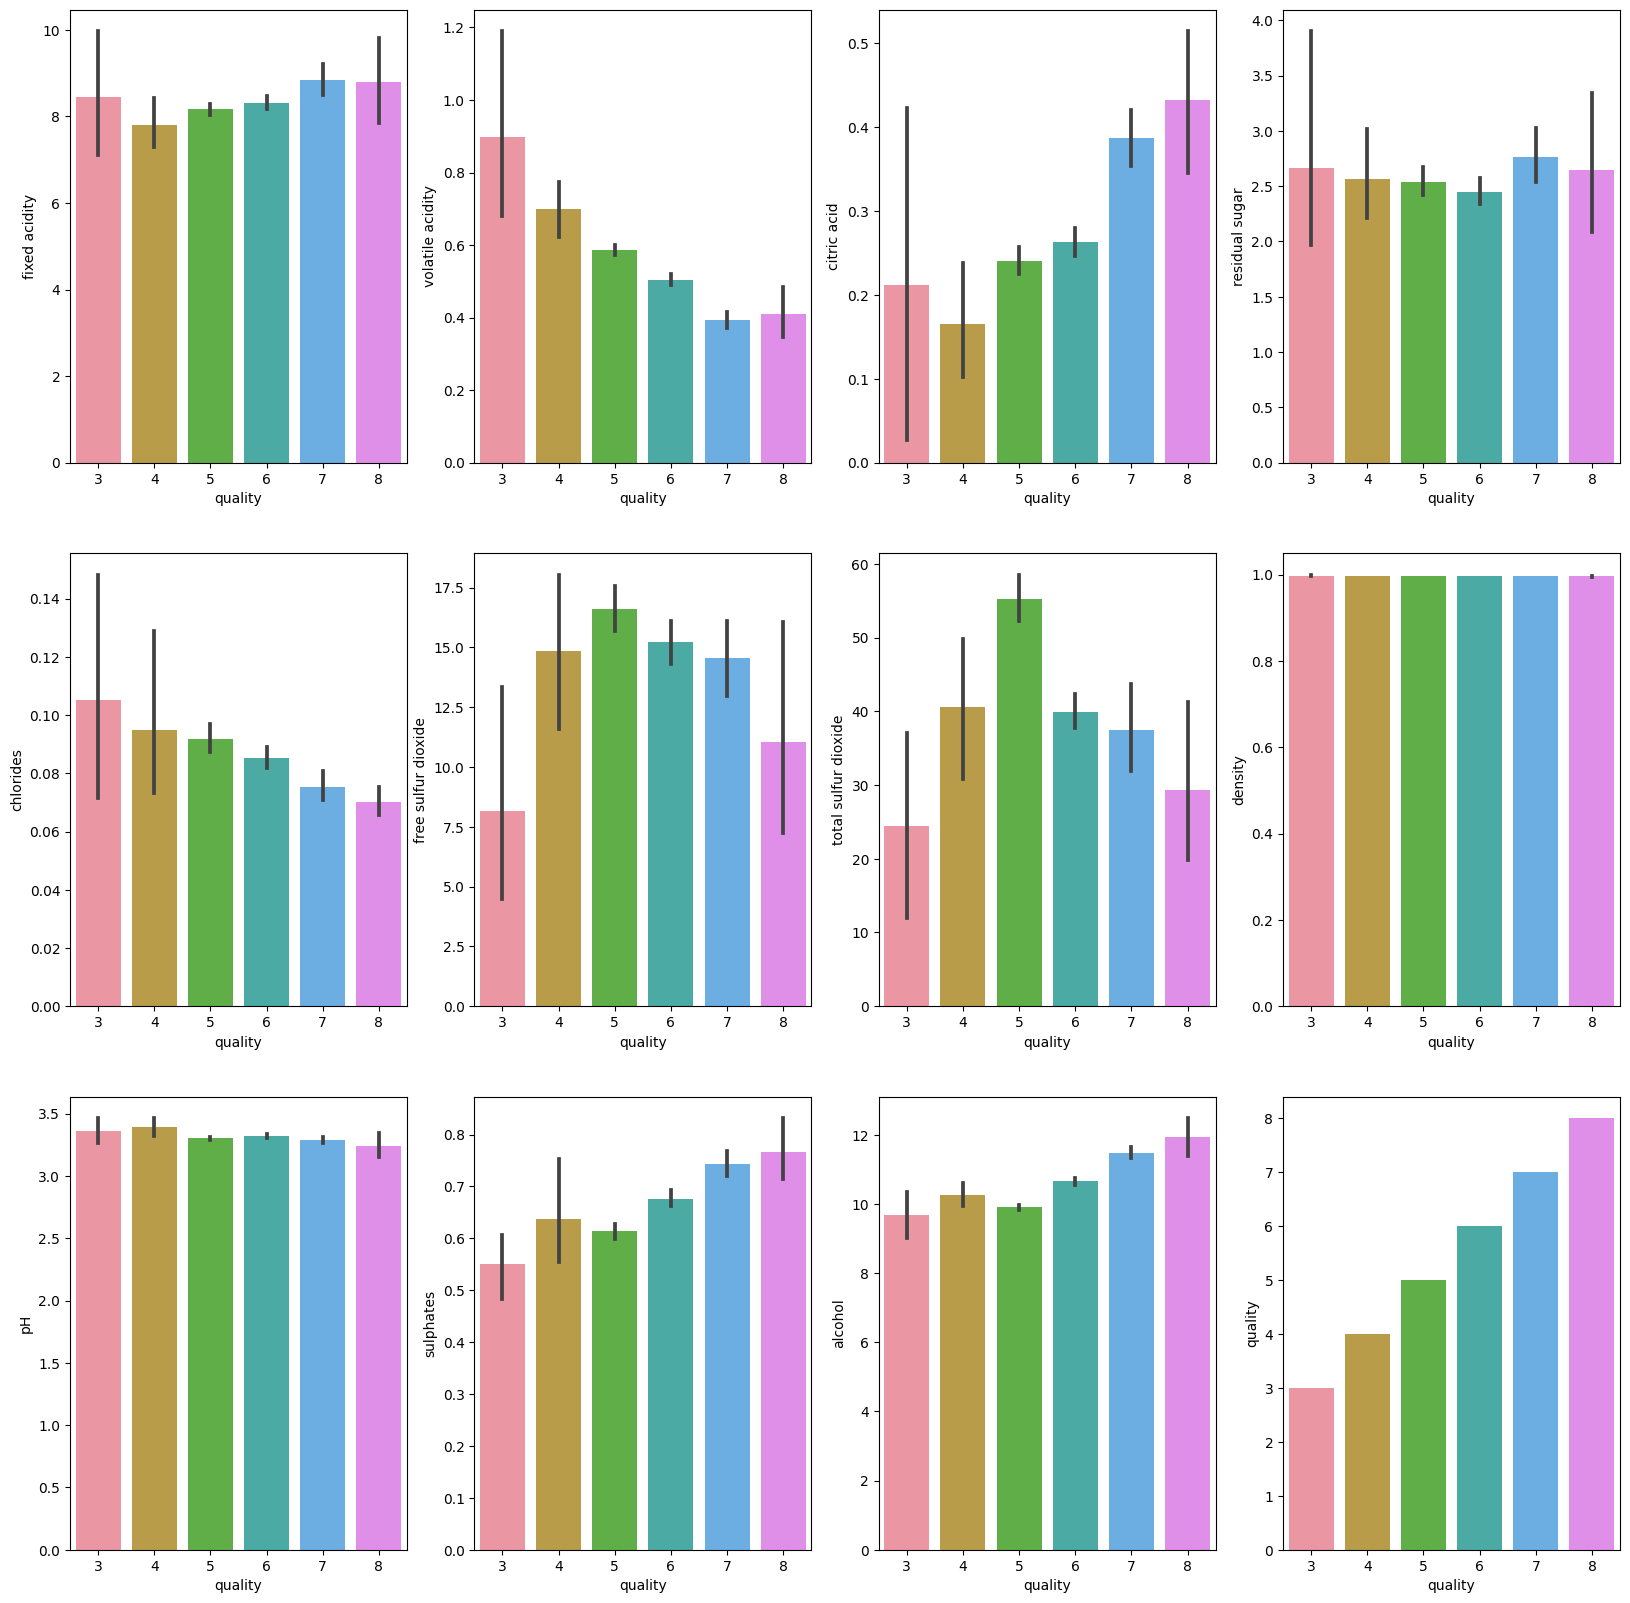

In [ ]:

from scipy.stats import skew
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
fig, axes = plt.subplots(3, 4, figsize=(20,20))
for i, ax in enumerate(axes.flat):
    sns.barplot(data = a, y = features[i], x = 'quality', ax = ax)

    sk = skew(a[features[i]])

    print("Feature {} has skewness {}".format(features[i], sk))

Feature fixed acidity has skewness 1.0435581570203705
Feature volatile acidity has skewness 0.6806526689497612
Feature citric acid has skewness 0.3710729929318701
Feature residual sugar has skewness 4.355371093085976
Feature chlorides has skewness 6.018448660519524
Feature free sulfur dioxide has skewness 1.229644739026475
Feature total sulfur dioxide has skewness 1.6635791721121174
Feature density has skewness 0.10226068292206784
Feature pH has skewness 0.22084807837665207
Feature sulphates has skewness 2.4939876038821924
Feature alcohol has skewness 0.8621798614666255
Feature quality has skewness 0.2864151961088048


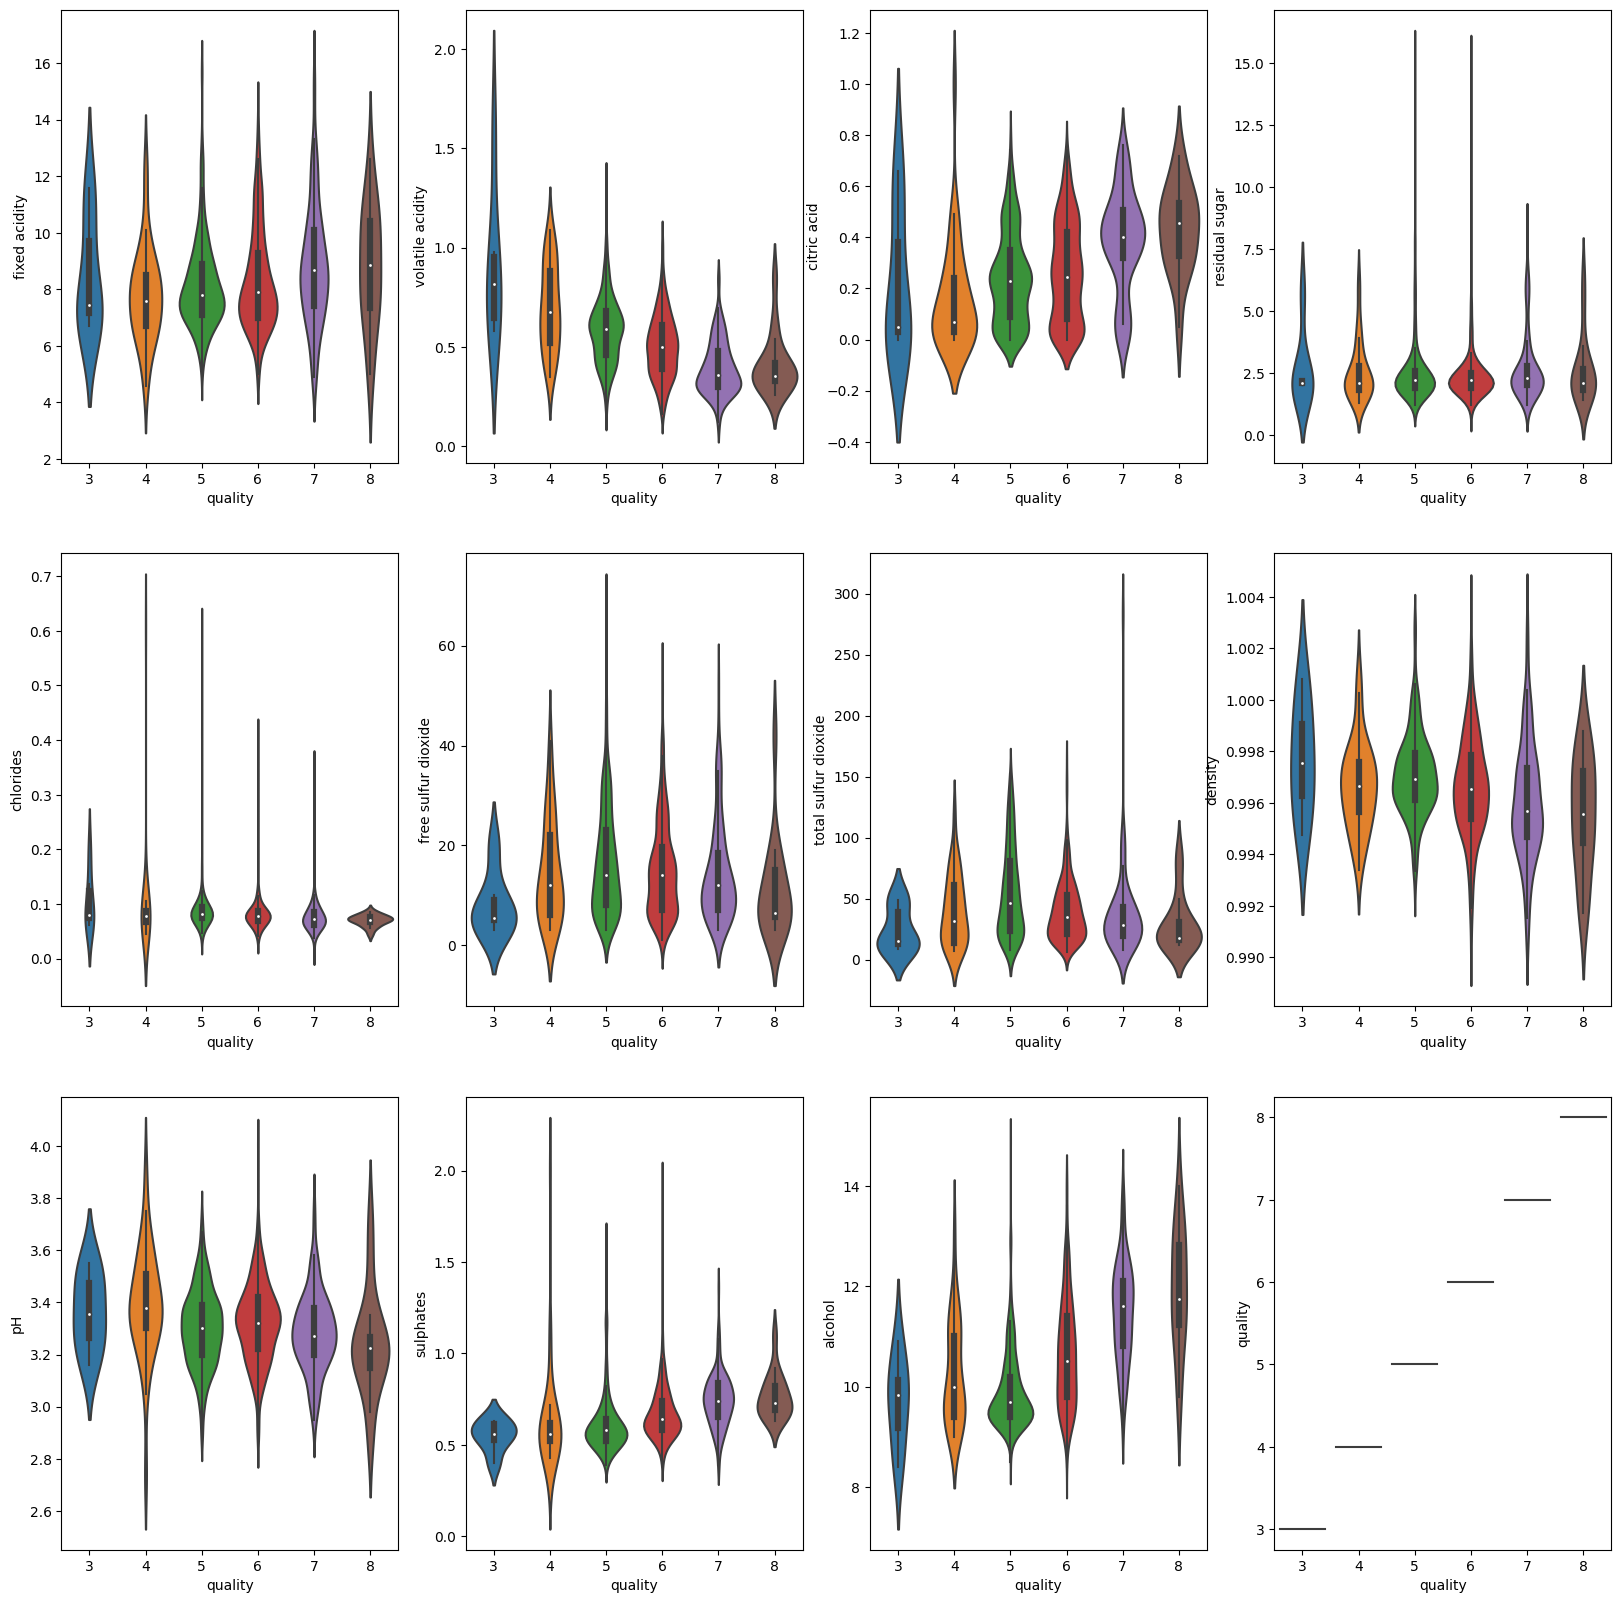

In [ ]:

from scipy.stats import skew
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
fig, axes = plt.subplots(3, 4, figsize=(20,20))
for i, ax in enumerate(axes.flat):
    sns.violinplot(data = a, y = features[i], x = 'quality', ax = ax)

    sk = skew(a[features[i]])

    print("Feature {} has skewness {}".format(features[i], sk))

Feature fixed acidity has skewness 1.0435581570203705
Feature volatile acidity has skewness 0.6806526689497612
Feature citric acid has skewness 0.3710729929318701
Feature residual sugar has skewness 4.355371093085976
Feature chlorides has skewness 6.018448660519524
Feature free sulfur dioxide has skewness 1.229644739026475
Feature total sulfur dioxide has skewness 1.6635791721121174
Feature density has skewness 0.10226068292206784
Feature pH has skewness 0.22084807837665207
Feature sulphates has skewness 2.4939876038821924
Feature alcohol has skewness 0.8621798614666255
Feature quality has skewness 0.2864151961088048


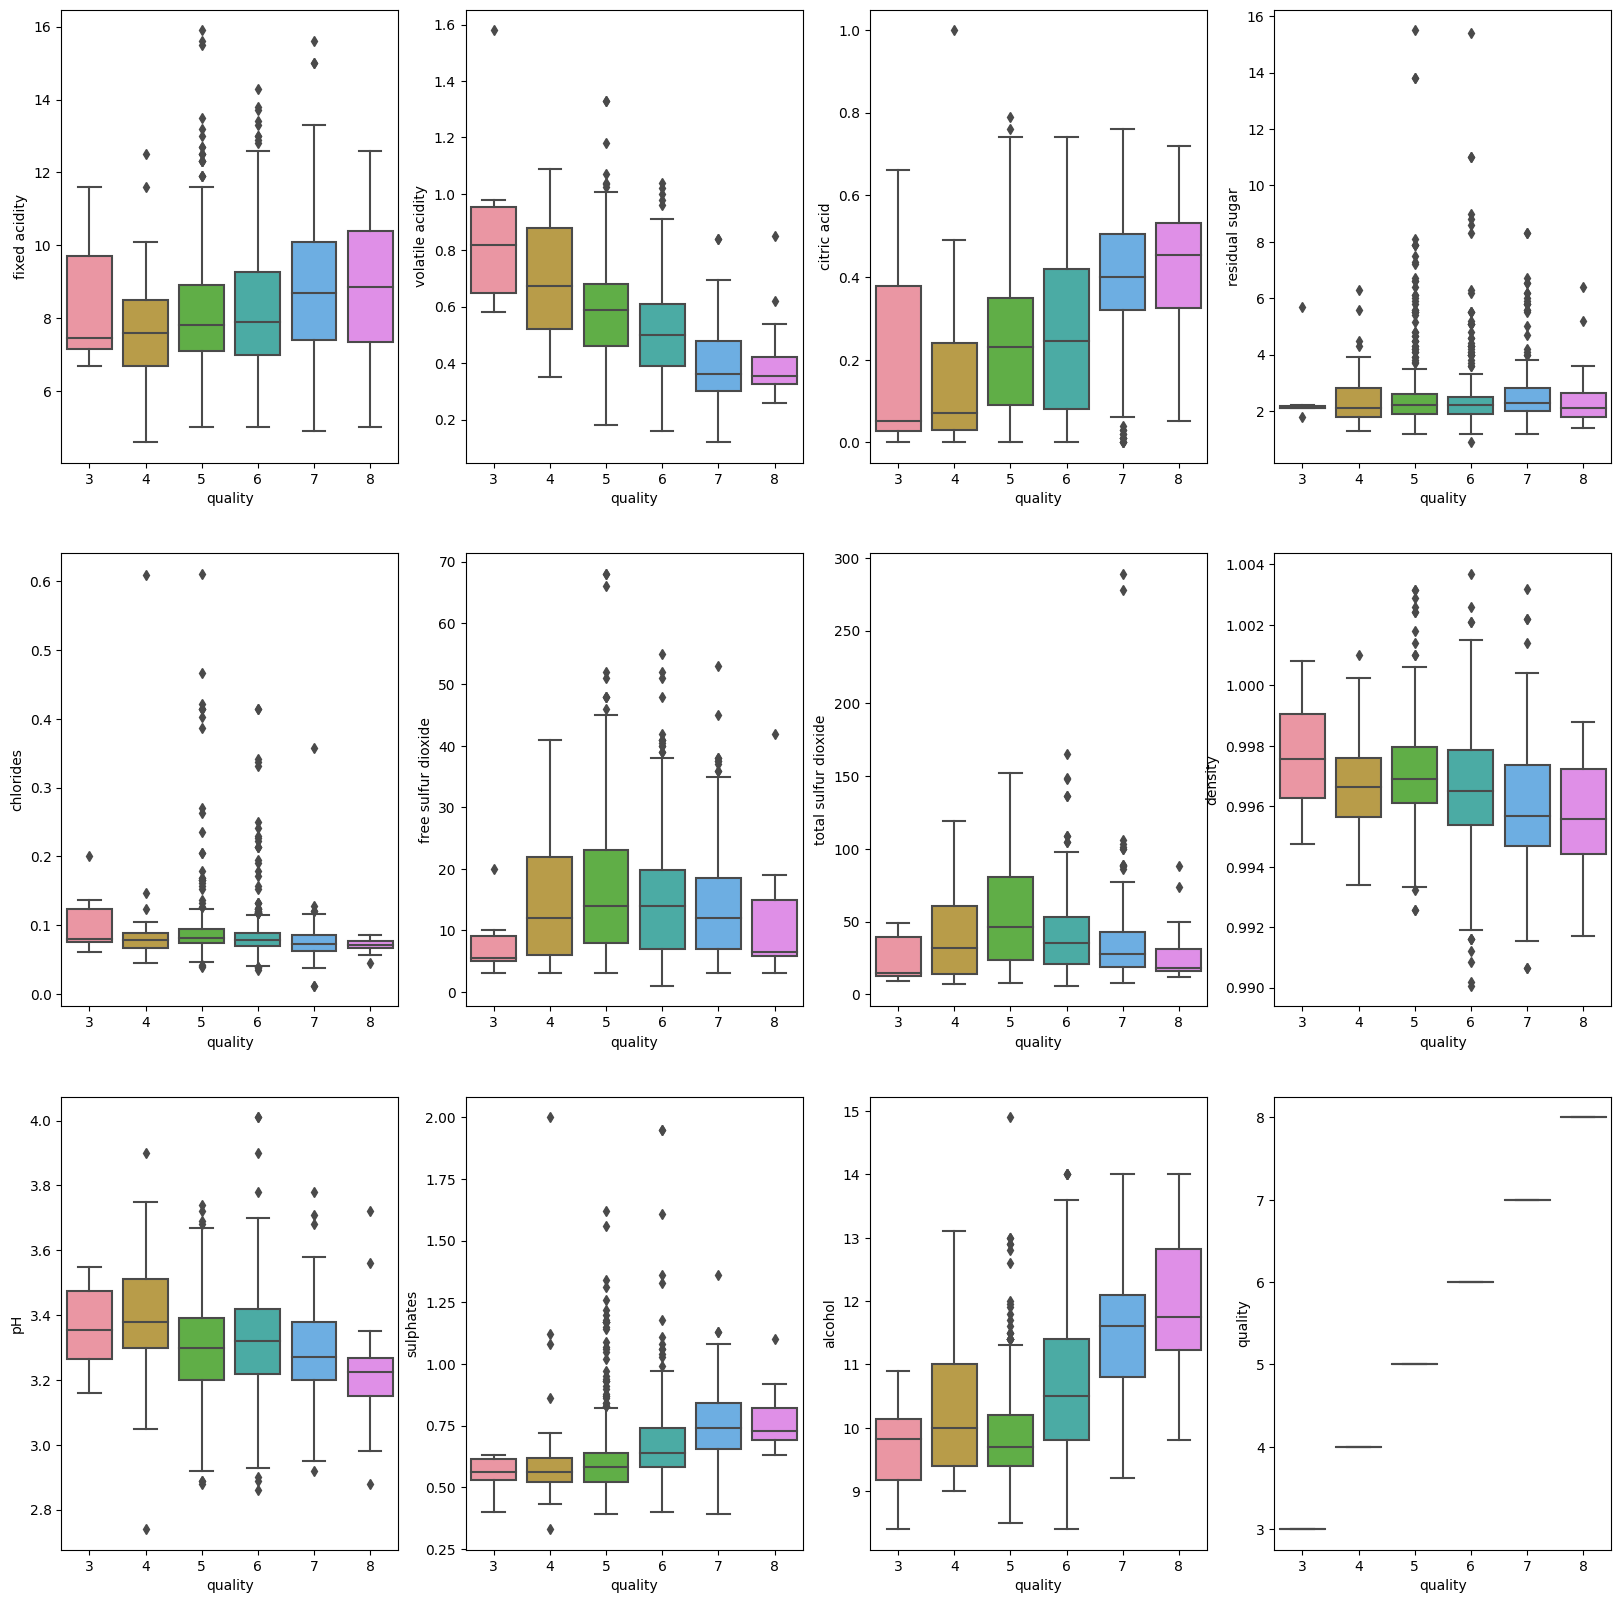

In [ ]:

from scipy.stats import skew
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
fig, axes = plt.subplots(3, 4, figsize=(20,20))
for i, ax in enumerate(axes.flat):
    sns.boxplot(data = a, y = features[i], x = 'quality', ax = ax)

    sk = skew(a[features[i]])

    print("Feature {} has skewness {}".format(features[i], sk))

Feature fixed acidity has skewness 1.0435581570203705
Feature volatile acidity has skewness 0.6806526689497612
Feature citric acid has skewness 0.3710729929318701
Feature residual sugar has skewness 4.355371093085976
Feature chlorides has skewness 6.018448660519524
Feature free sulfur dioxide has skewness 1.229644739026475
Feature total sulfur dioxide has skewness 1.6635791721121174
Feature density has skewness 0.10226068292206784
Feature pH has skewness 0.22084807837665207
Feature sulphates has skewness 2.4939876038821924
Feature alcohol has skewness 0.8621798614666255
Feature quality has skewness 0.2864151961088048


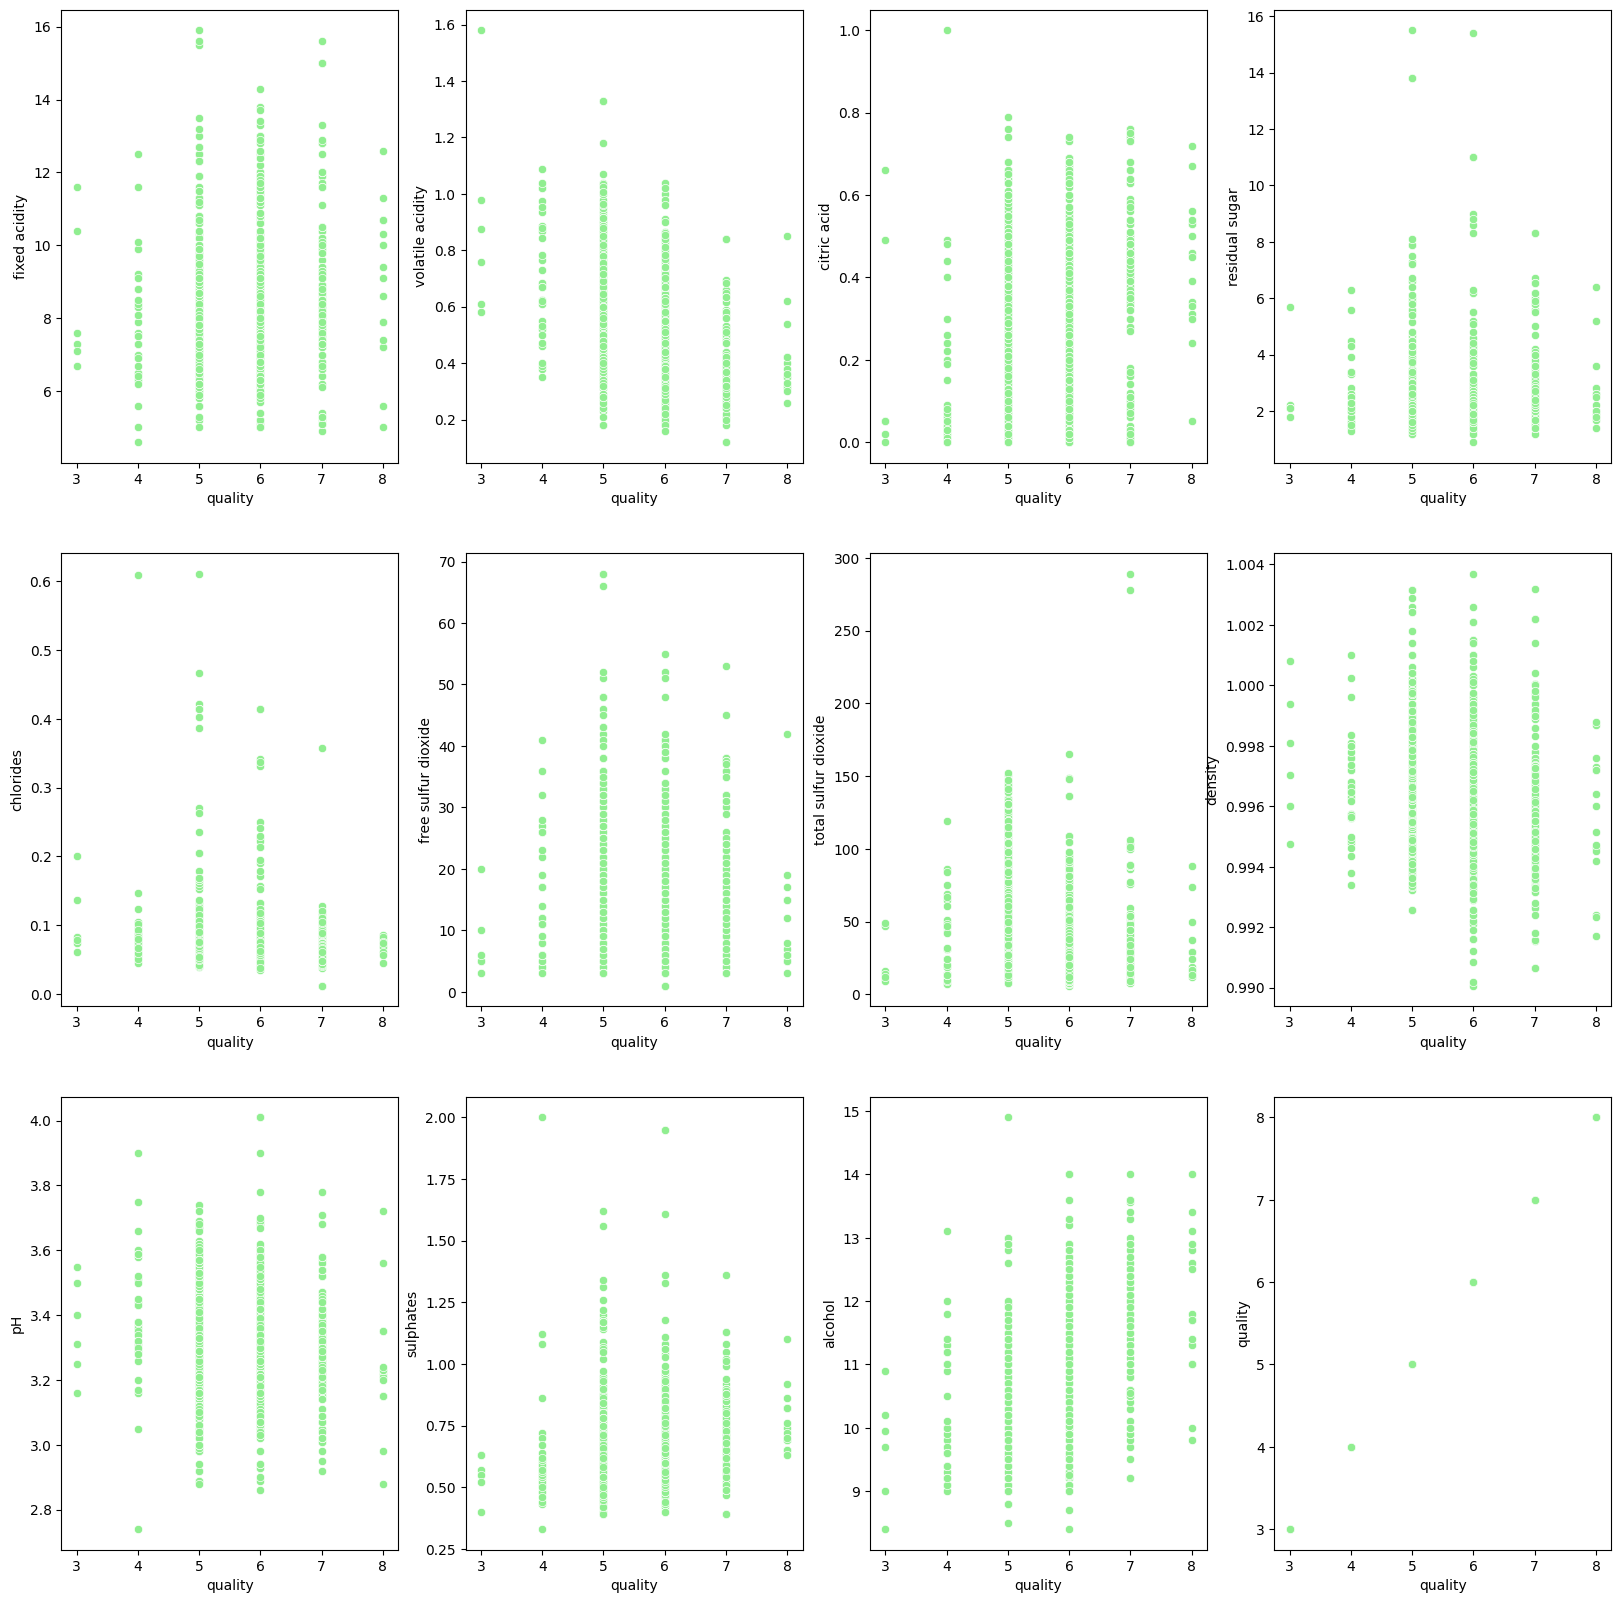

In [ ]:

from scipy.stats import skew
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
fig, axes = plt.subplots(3, 4, figsize=(20,20))
for i, ax in enumerate(axes.flat):
    sns.scatterplot(data = a, y = features[i], x = 'quality', ax = ax)

    sk = skew(a[features[i]])

    print("Feature {} has skewness {}".format(features[i], sk))

<Axes: title={'center': 'Correlation with quality'}>

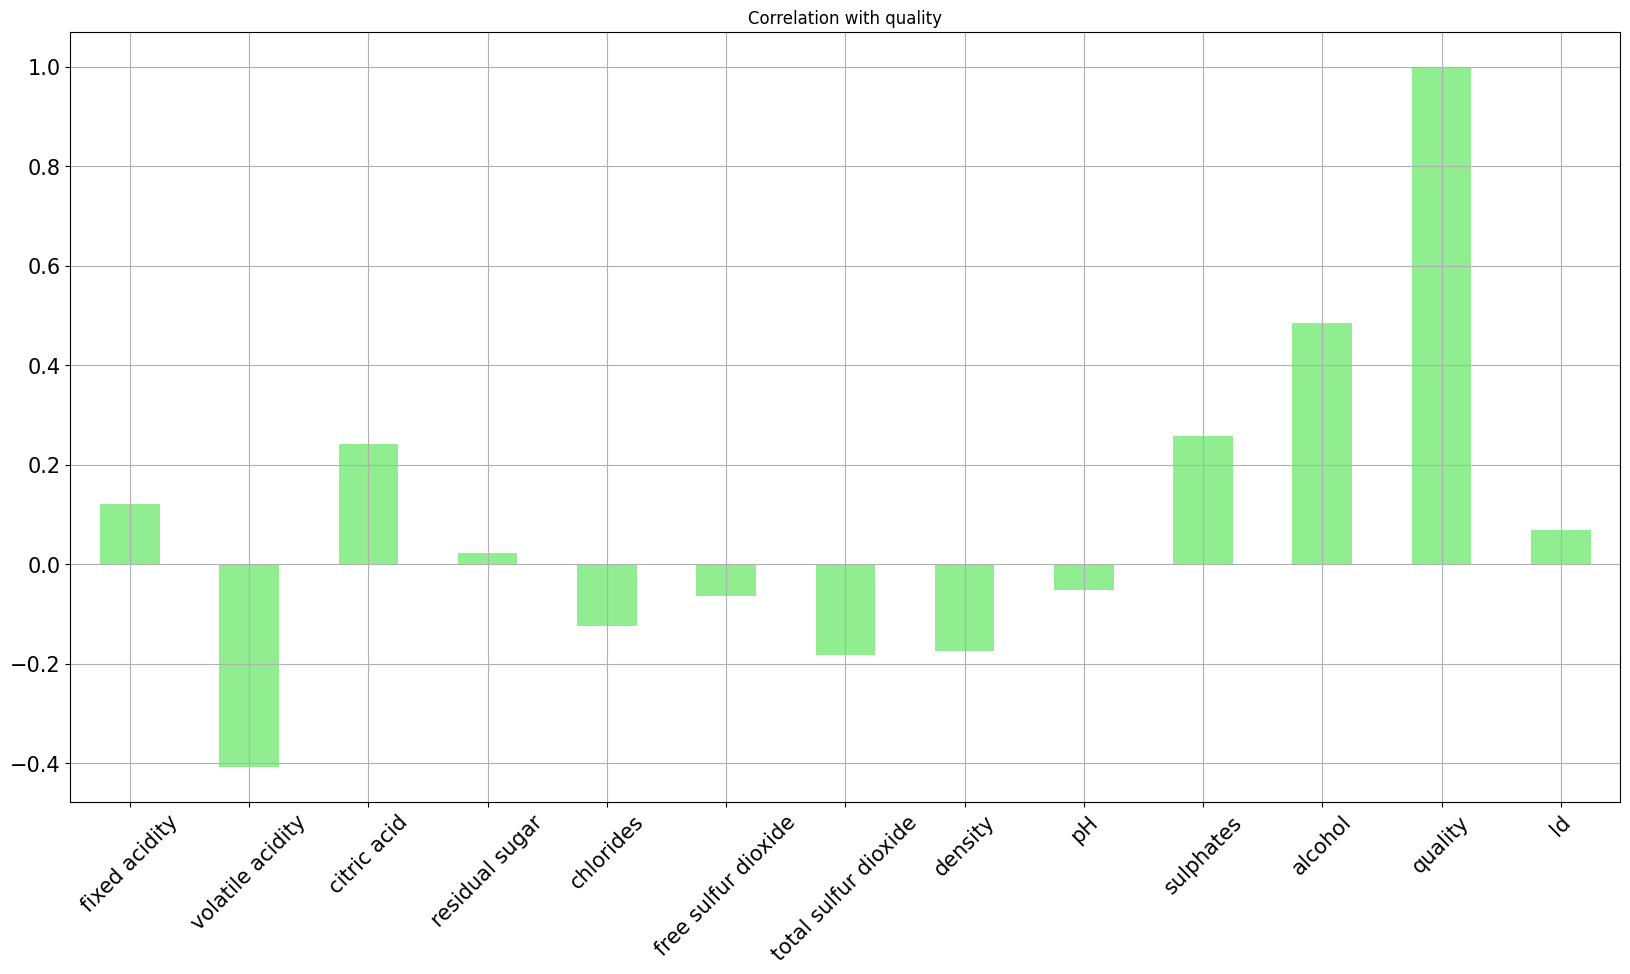

In [ ]:
a.corrwith(a.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

<Axes: xlabel='volatile acidity', ylabel='alcohol'>

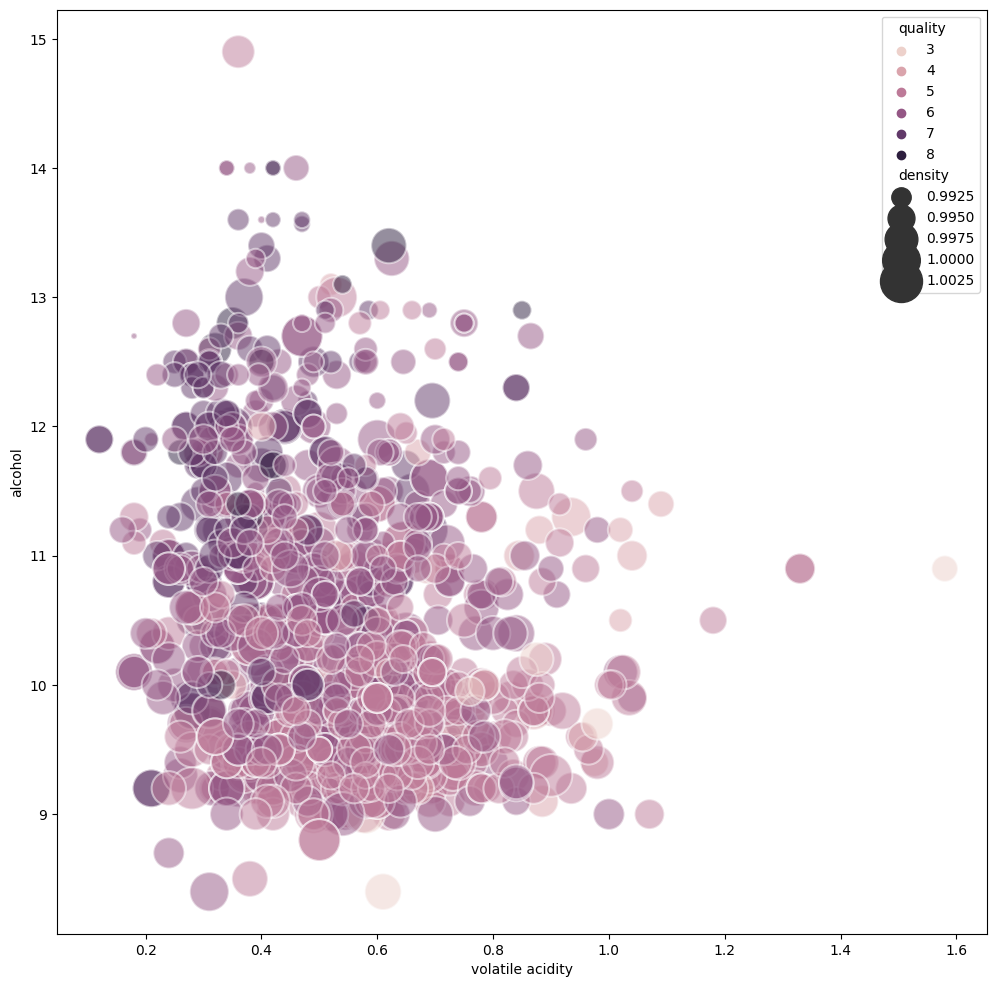

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
#sizes=(20, 1000),
sns.color_palette("Blues", as_cmap=True)

sns.scatterplot(data = a, x = "volatile acidity", y = "alcohol", hue = "quality", alpha=0.5, size = 'density' , sizes = (20, 1000))

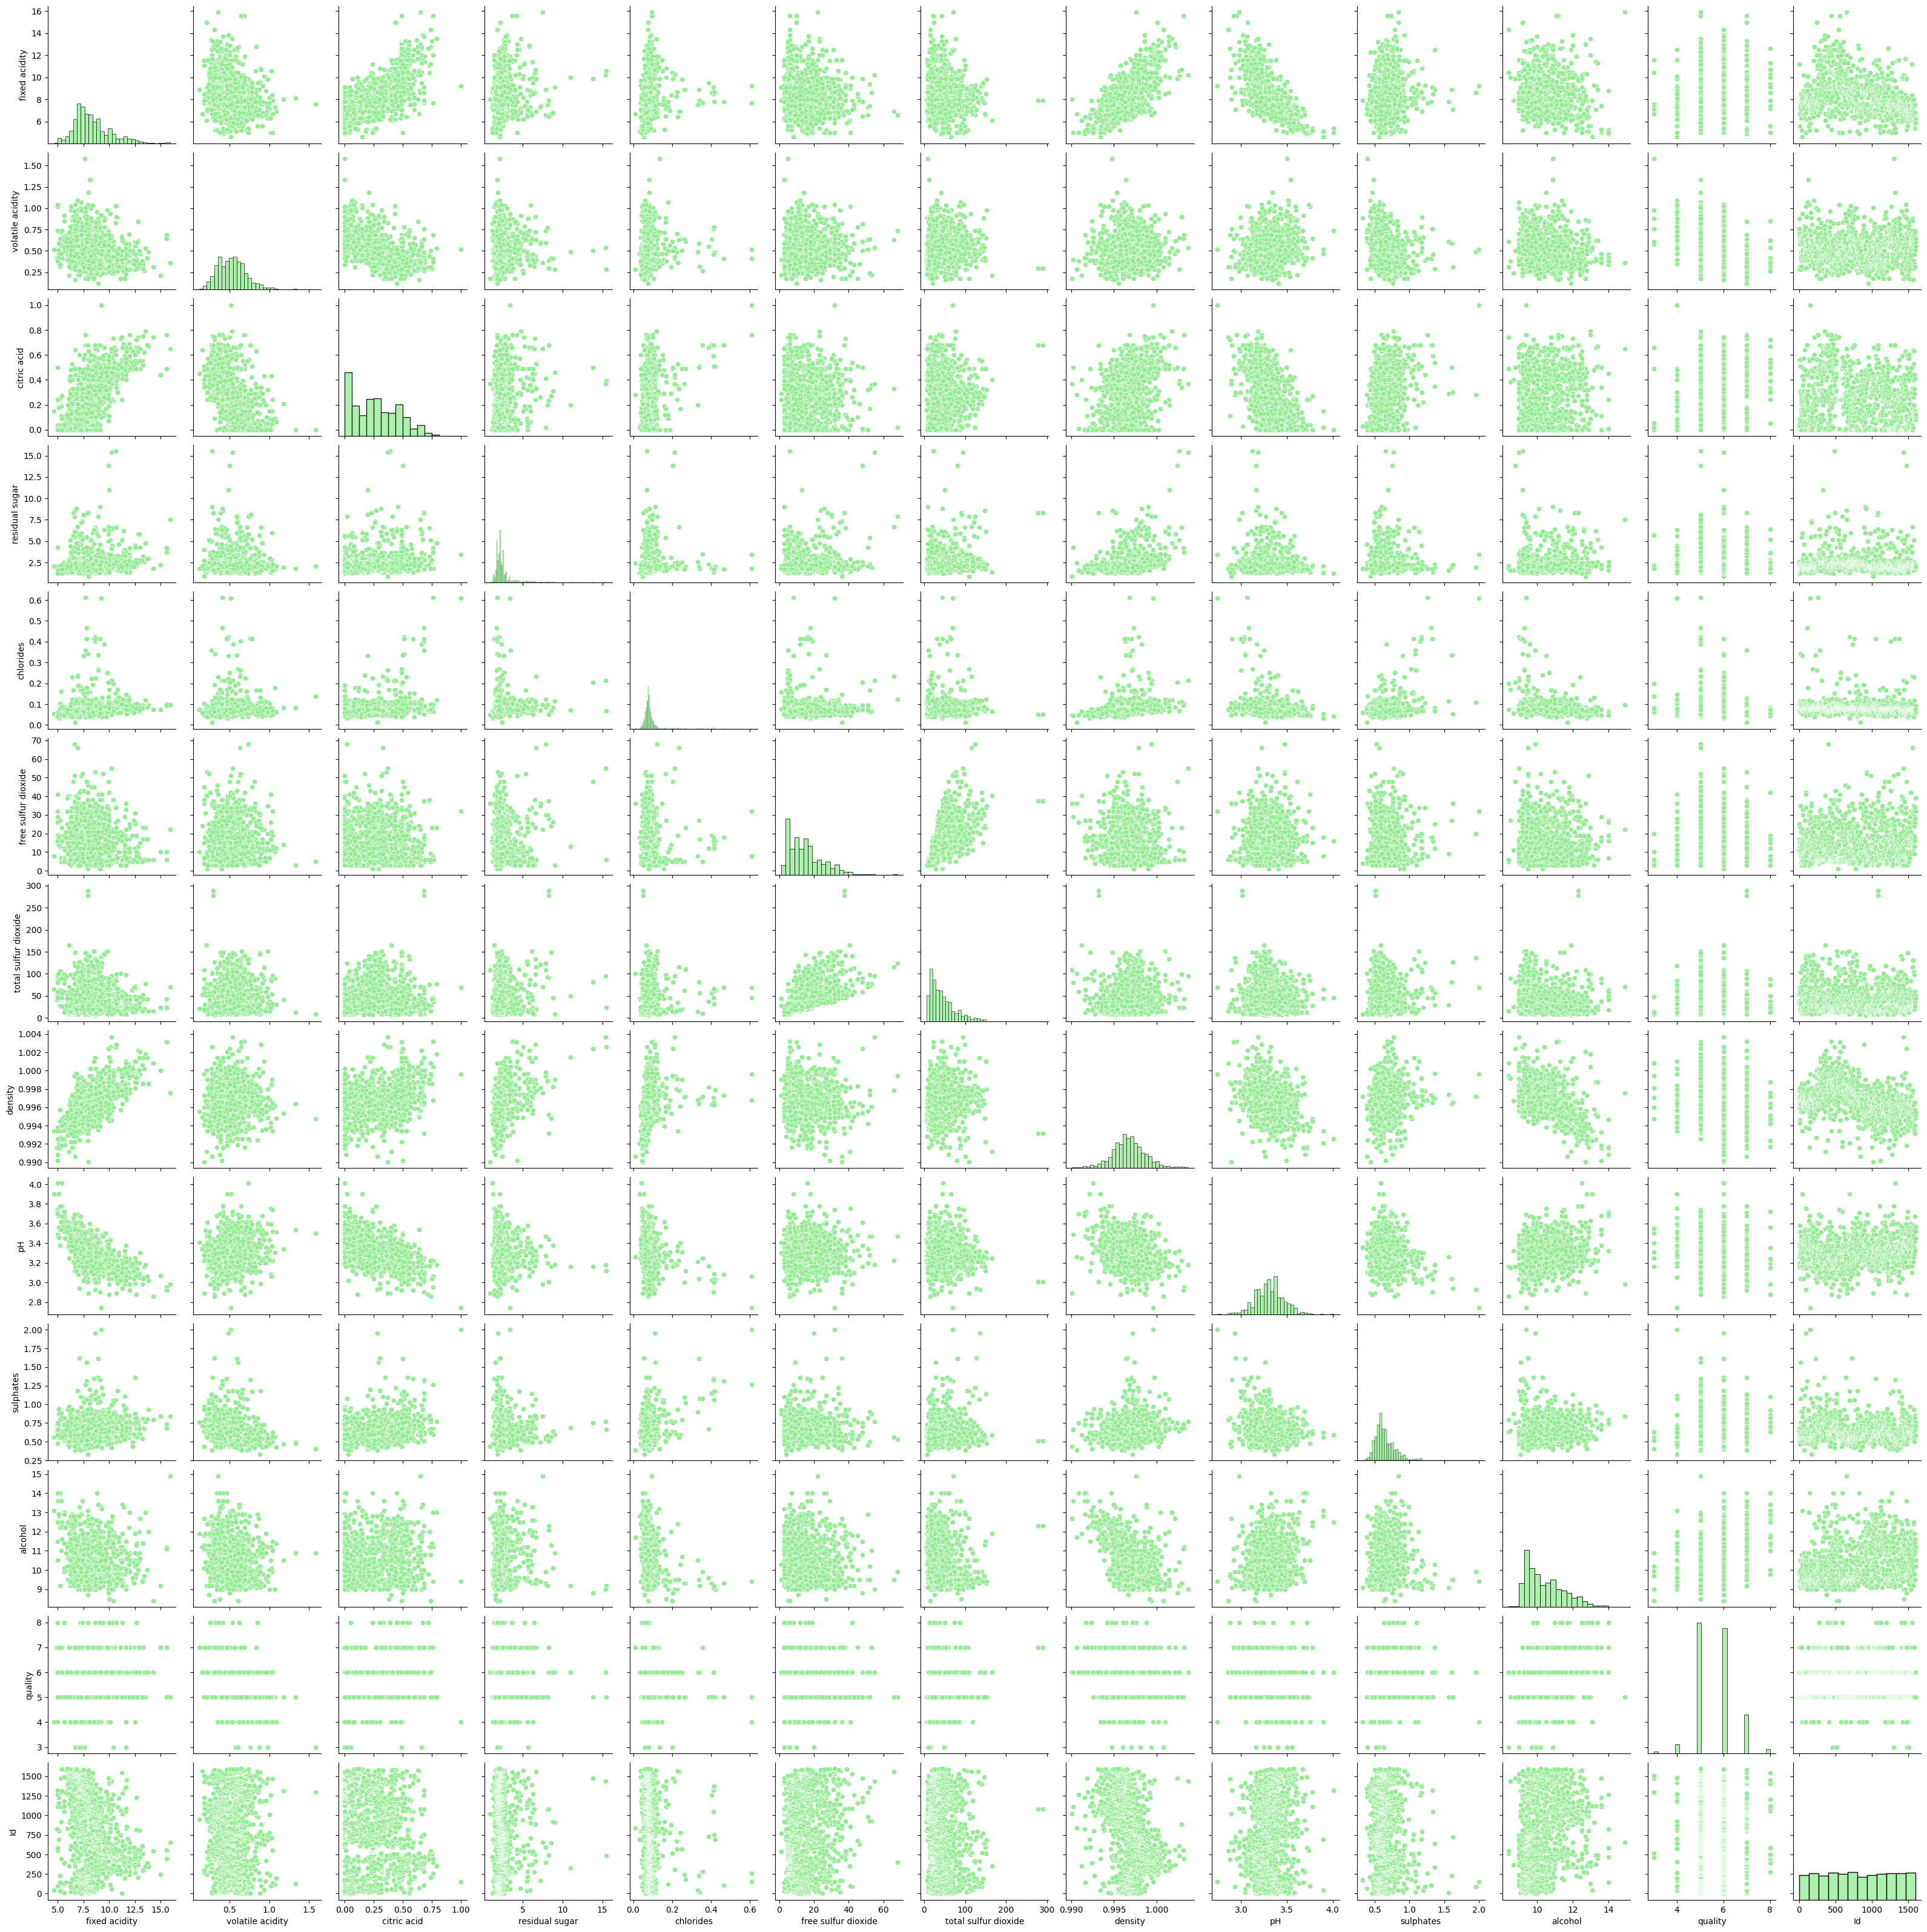

In [ ]:
sns.pairplot(a)


<Axes: >

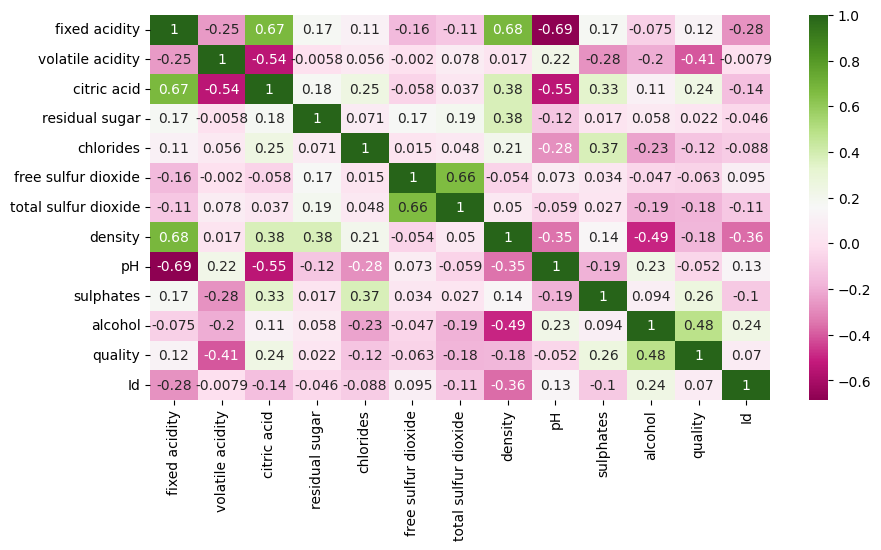

In [ ]:
corr=a.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True, cmap='PiYG')

**Data pre-processing**

In [ ]:

a.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [ ]:
a['quality'] = a['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})


In [ ]:
a['quality']

0        bad
1        bad
2        bad
3       good
4        bad
        ... 
1138    good
1139    good
1140     bad
1141    good
1142     bad
Name: quality, Length: 1143, dtype: object

In [ ]:
a['quality'].value_counts()

good    621
bad     522
Name: quality, dtype: int64

In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

a['quality'] = le.fit_transform(a['quality'])

a['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
1138    1
1139    1
1140    0
1141    1
1142    0
Name: quality, Length: 1143, dtype: int64>

In [ ]:
X = a.drop(['quality'],axis=1)
y = a.quality

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=38,stratify=y)

In [ ]:
print(X.shape)
print(y.shape)

(1143, 12)
(1143,)


In [ ]:
print(X.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Id'],
      dtype='object')


In [ ]:
numeric_features = a.describe().columns[:-1]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(857, 12)
(857, 3)
(286, 12)
(286, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


**Modelling**

**Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


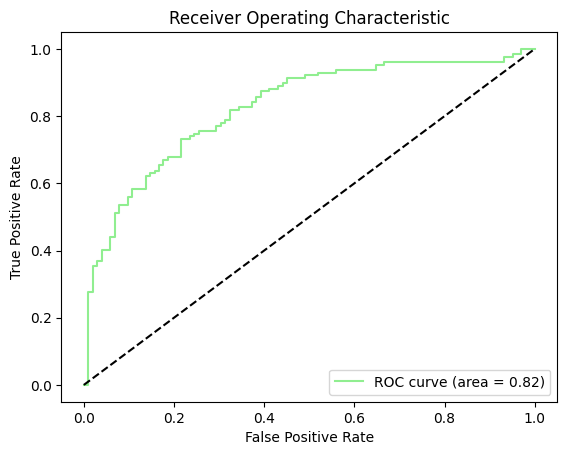

Accuracy 0.74235807860262
Classification               precision    recall  f1-score   support

           0       0.72      0.69      0.70       102
           1       0.76      0.79      0.77       127

    accuracy                           0.74       229
   macro avg       0.74      0.74      0.74       229
weighted avg       0.74      0.74      0.74       229

Confusion Matrix [[ 70  32]
 [ 27 100]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Assuming 'X' is the input features dataframe and 'y' is the target variable series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)
y_pred=model.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred)
report_lr=confusion_matrix(y_test,y_pred)
cm_lr= classification_report(y_test,y_pred)

# Compute false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("Accuracy",acc_lr)
print("Classification",cm_lr)
print("Confusion Matrix",report_lr)

**DECISION TREE CLASSIFIER**

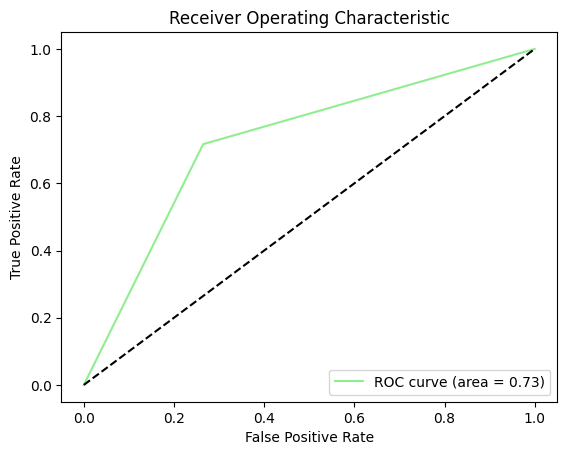

Accuracy 0.7248908296943232
Classification               precision    recall  f1-score   support

           0       0.68      0.74      0.70       102
           1       0.77      0.72      0.74       127

    accuracy                           0.72       229
   macro avg       0.72      0.73      0.72       229
weighted avg       0.73      0.72      0.73       229

Confusion Matrix [[75 27]
 [36 91]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Define and train the Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)
y_pred=model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred)
report_dt=confusion_matrix(y_test,y_pred)
cm_dt= classification_report(y_test,y_pred)

# Compute false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("Accuracy",acc_dt)
print("Classification",cm_dt)
print("Confusion Matrix",report_dt)

**Support Vector Machine**

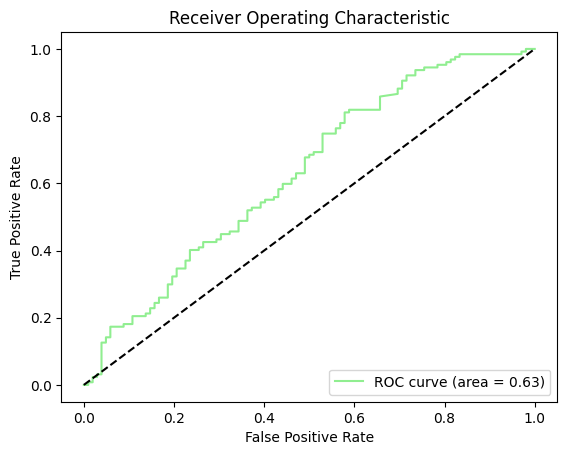

Accuracy 0.6375545851528385
Classification               precision    recall  f1-score   support

           0       0.74      0.28      0.41       102
           1       0.62      0.92      0.74       127

    accuracy                           0.64       229
   macro avg       0.68      0.60      0.57       229
weighted avg       0.67      0.64      0.59       229

Confusion Matrix [[ 29  73]
 [ 10 117]]


In [ ]:
from sklearn.svm import SVC

# Define and train the SVM model
model = SVC(probability=True)
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)
y_pred=model.predict(X_test)

acc_sv = accuracy_score(y_test, y_pred)
report_sv=confusion_matrix(y_test,y_pred)
cm_sv= classification_report(y_test,y_pred)

# Compute false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("Accuracy",acc_sv)
print("Classification",cm_sv)
print("Confusion Matrix",report_sv)

**Random Forest**

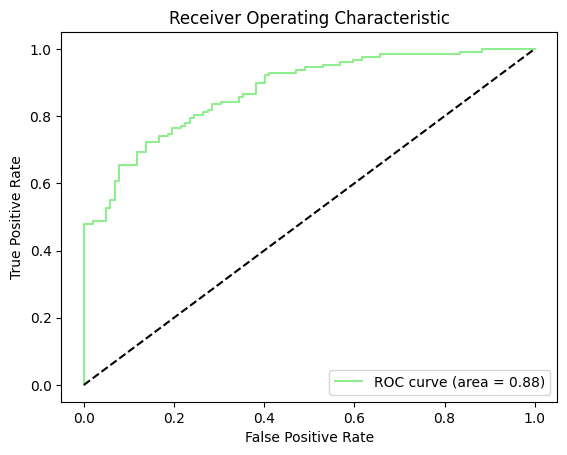

Accuracy 0.6375545851528385
Classification               precision    recall  f1-score   support

           0       0.74      0.28      0.41       102
           1       0.62      0.92      0.74       127

    accuracy                           0.64       229
   macro avg       0.68      0.60      0.57       229
weighted avg       0.67      0.64      0.59       229

Confusion Matrix [[ 29  73]
 [ 10 117]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc


# Assuming 'quality' is the target variable/column
target_column = 'quality'

# Assuming 'X' is the input features dataframe and 'y' is the target variable series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer and preprocessing steps
numeric_features = X.columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features)])

# Create the pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('randomforest', RandomForestClassifier(max_depth=15, n_estimators=400))])

# Fit the pipeline to the training data
rfc = pipeline.fit(X_train, y_train)
y_pred=model.predict(X_test)

# Predict probabilities for the test set
y_pred_proba = rfc.predict_proba(X_test)

acc_rf = accuracy_score(y_test, y_pred)
report_rf=confusion_matrix(y_test,y_pred)
cm_rf= classification_report(y_test,y_pred)

# Compute false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("Accuracy",acc_rf)
print("Classification",cm_rf)
print("Confusion Matrix",report_rf)


**Naive_bayes**

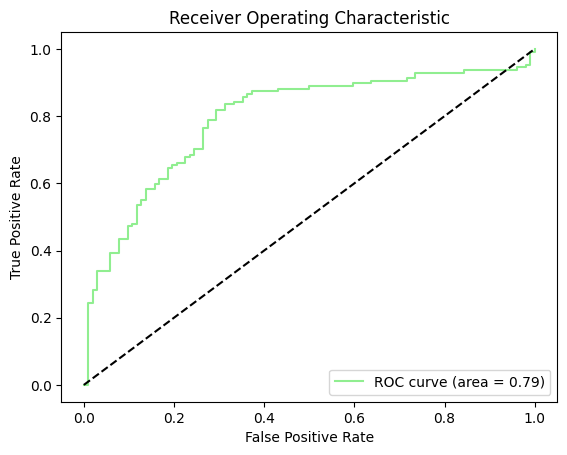

Accuracy 0.7641921397379913
Classification               precision    recall  f1-score   support

           0       0.77      0.67      0.72       102
           1       0.76      0.84      0.80       127

    accuracy                           0.76       229
   macro avg       0.77      0.75      0.76       229
weighted avg       0.77      0.76      0.76       229

Confusion Matrix [[ 68  34]
 [ 20 107]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'X' is the input features dataframe and 'y' is the target variable series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)
y_pred=model.predict(X_test)

acc_na = accuracy_score(y_test, y_pred)
report_na=confusion_matrix(y_test,y_pred)
cm_na= classification_report(y_test,y_pred)


# Compute false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("Accuracy",acc_na)
print("Classification",cm_na)
print("Confusion Matrix",report_na)

In [ ]:
accuracies = [acc_lr, acc_dt, acc_sv, acc_rf, acc_na]
confusion_matrices = [report_lr, report_dt, report_sv, report_rf, report_na,]
report = [cm_lr, cm_dt, cm_sv, cm_rf, cm_na]

ValueError: ignored

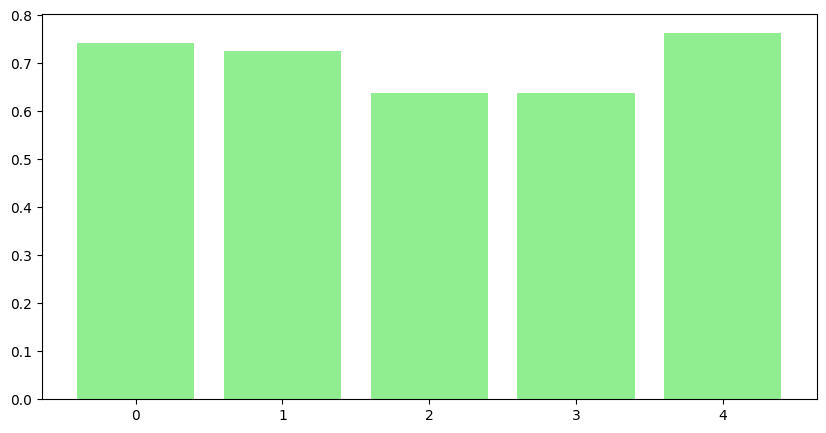

In [ ]:
import matplotlib.pyplot as plt

# Define the classifiers
classifiers = ["Logistic Regression", "Decision Tree", "SVM", "KNN", "Naive Bayes", "Random Forest"]

# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.bar(range(len(accuracies)), accuracies, tick_label=classifiers)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Classifiers")
plt.show()

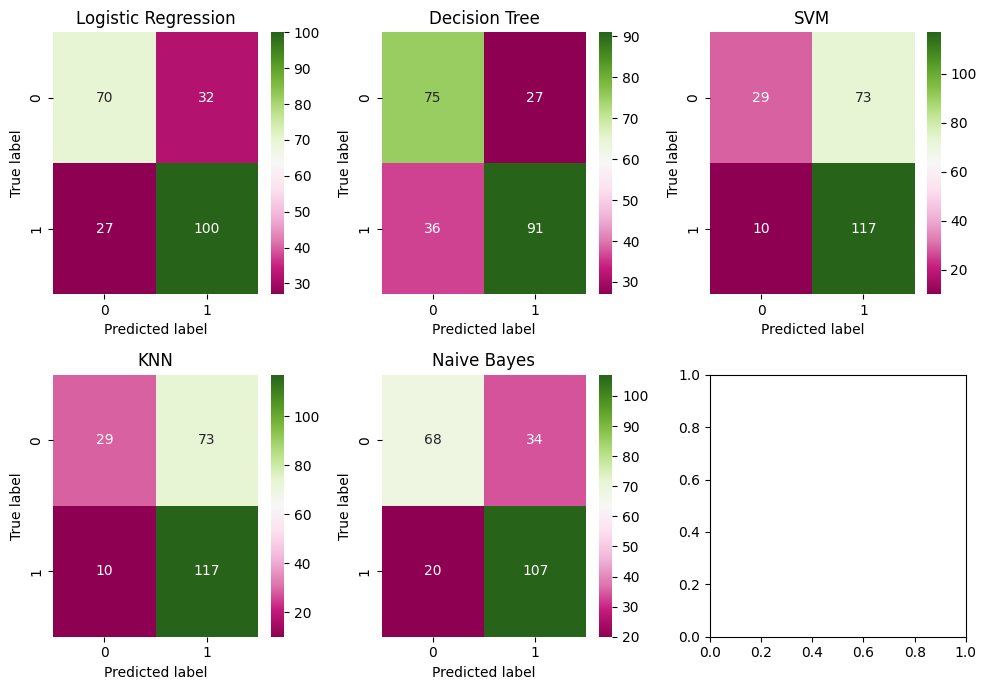

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the classifiers
classifiers = ["Logistic Regression", "Decision Tree", "SVM", "KNN", "Naive Bayes", "Random Forest"]

# Create subplots for confusion matrices
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

# Plot confusion matrices
for ax, cm, classifier in zip(axes.flatten(), confusion_matrices, classifiers):
    sns.heatmap(cm, annot=True, fmt="d", cmap="PiYG", ax=ax)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(classifier)

# Adjust layout and display plot
plt.tight_layout()
plt.show()